In [1]:
from keras.datasets import mnist
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load the dataset, it comes in test and train sets
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [5]:
#shape of the dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


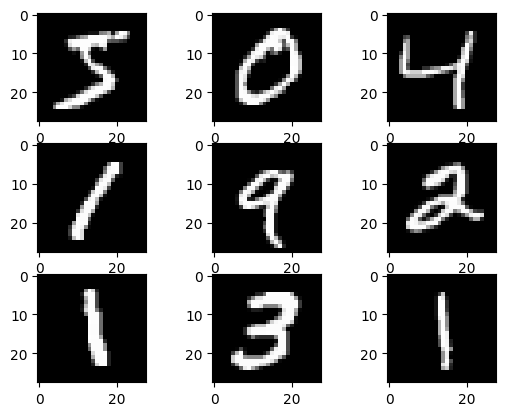

In [29]:
#plot the first 9 images from the training dataset
from matplotlib import pyplot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [36]:
# Normalize and preprocess the data
img_rows, img_cols = 28, 28
num_classes = 10
input_shape = (img_rows, img_cols, 1)

#reshaping the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels) 
train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1).astype('float32') / 255
test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1).astype('float32') / 255


# Converting the labels to categorical vectors
train_Y = to_categorical(train_Y, num_classes)
test_Y = to_categorical(test_Y, num_classes)

# Build the CNN model
model = Sequential() # Sequential model is a linear stack of layers (each layer has one input tensor and one output tensor)  
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) #
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling operation for spatial data
model.add(Flatten()) # Flattens the input
model.add(Dense(num_classes, activation='softmax'))  # Output layer with 'num_classes' neurons for classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_X, train_Y, batch_size=128, epochs=10, validation_data=(test_X, test_Y))

# Evaluate the model
accuracy = model.evaluate(test_X, test_Y)
print(f'Test accuracy: {accuracy[1]*100:.2f}%')


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8525 - loss: 0.5568 - val_accuracy: 0.9697 - val_loss: 0.1127
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9688 - loss: 0.1113 - val_accuracy: 0.9735 - val_loss: 0.0823
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9788 - loss: 0.0724 - val_accuracy: 0.9797 - val_loss: 0.0638
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9838 - loss: 0.0584 - val_accuracy: 0.9790 - val_loss: 0.0649
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9854 - loss: 0.0504 - val_accuracy: 0.9834 - val_loss: 0.0530
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9871 - loss: 0.0442 - val_accuracy: 0.9827 - val_loss: 0.0522
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9883 - loss: 0.0394 - val_accuracy: 0.9810 - val_loss: 0.0545
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9888 - loss: 0.0342 - 

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(test_X)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_Y, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
# f,ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(confusion_mtx, annot=True, ax=ax, cmap="Blues", fmt='g')
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

#print confusion matrix and label also 
import pandas as pd
df = pd.DataFrame(confusion_mtx)
df.index.name = 'Actual'
df.columns.name = 'Predicted'
print(df)




#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))




313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Predicted    0     1     2    3    4    5    6     7    8    9
Actual                                                        
0          973     0     1    0    0    0    2     1    2    1
1            1  1127     2    1    1    0    1     1    1    0
2            3     4  1008    2    2    0    1     8    3    1
3            0     0     1  994    0    5    0     5    4    1
4            1     0     0    0  970    0    1     0    1    9
5            2     0     1    6    0  879    2     0    1    1
6            8     2     0    0    5    3  938     0    2    0
7            0     2     8    1    1    0    0  1015    1    0
8            8     0     1    1    1    1    2     4  949    7
9            2     0     0    1    8    1    0    10    1  986
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


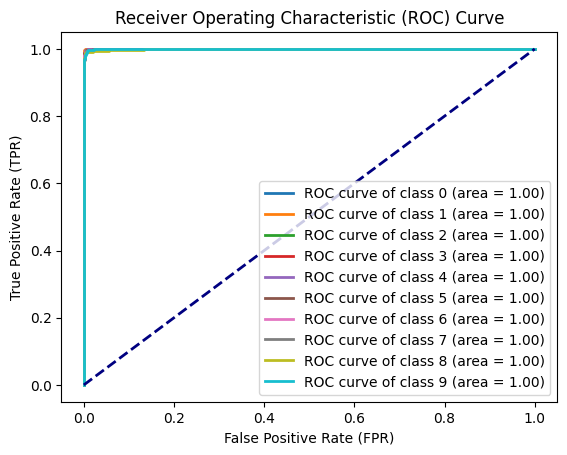

In [38]:
#plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score = model.predict(test_X)
y_test = label_binarize(test_y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()





1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


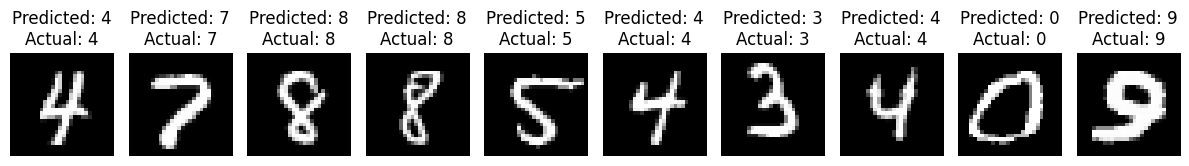

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Select 10 random test images
num_samples = 10
indices = np.random.randint(0, test_X.shape[0], num_samples)
test_images = test_X[indices]
true_labels = test_Y[indices]

# Predict the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with predicted and actual labels
plt.figure(figsize=(12, 8))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}\nActual: {np.argmax(true_labels[i])}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [40]:
# SVM on MNIST dataset
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

# Load MNIST dataset
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

# Normalize and preprocess the data
img_rows, img_cols = 28, 28
num_classes = 10
input_shape = (img_rows, img_cols, 1)

#reshaping the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
#because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1).astype('float32') / 255
test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1).astype('float32') / 255

train_Y = train_Y.astype('float32')
test_Y = test_Y.astype('float32')

# Flatten the images
train_X = train_X.reshape((-1, 784))
test_X = test_X.reshape((-1, 784))

# Build the SVM model
model = svm.SVC(kernel='linear', C=1, gamma=1)

# Train the model
model.fit(train_X, train_Y)

# Evaluate the model
predictions = model.predict(test_X)
accuracy = accuracy_score(test_Y, predictions)
print(f'Test accuracy: {accuracy*100:.2f}%')



Test accuracy: 94.04%
